# **Lab 7: Optimization and learning**
**Felipe Vicencio**

# **Abstract**

In this lab we implement two optimzation methods: a gradient descent method and Newton's method. Then we test for accuracy and convergence, and conclude that the implementations are successful.

#**About the code**

In [0]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2020 Felipe Vicencio (fivn@kth.se)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

In [0]:
# Load neccessary modules.
from google.colab import files

import math
import time
import matplotlib.pyplot as plt
import numpy as np

# **Introduction**

The problem of optimization in $\mathbb{R}^n$ has led to a lot of fruitful research throughout the centuries.

To solve the problem in the unconstrained case, one of the most popular iterative algorithms is gradient descent. Taylor's formula for approximating $\Delta f(x)$ after a change $\Delta x$ leads to a need to maximize the dot product $-\nabla f(x) \cdot \Delta x$ in order to maximize the descent. To do so $\Delta x$ can be aligned with $-\nabla f(x)$.

There are many ways to choose the factor $\alpha$ at step $k$, and the one we choose is satisfying the condition $f(x - \alpha\nabla f(x)) \leq \beta f(x)$, where $\beta$ is a parameter (we choose $\beta = 0.995$). To try to speed up the search, we choose $\alpha$ as large as possible (but smaller than $1$, which we choose as an upper bound). We do this by doing a linear search of values for $\alpha$ that satisfy the condition starting at $\alpha = 1$ and ending at $\alpha = 10^{-4}$, with step size $\Delta \alpha = 10^{-4}$. The method we implemented halts when one such $\alpha$ can't be found at any one step, or when $\|\nabla f(x)\| \leq TOL$.

Another popular iterative algorithm is Newton's method. Taylor's formula (although expanded one more term) also leads to the increment $-Hf(x)^{-1}\nabla f(x)$. This assumes that $Hf(x)$ is invertible at each step. We can optionally multiply this increment with a factor $\gamma < 1$ to be able to guarantee convergence more often.

More details about all this can be found in the lecture notes and in Wikipedia.

# **Methods**

The gradientDescent method takes a function $f$ from $\mathbb{R}^n$ into $\mathbb{R}$, its gradient $df$ from $\mathbb{R}^n$ into $\mathbb{R}^n$ as input, and an initial guess $x0$, and outputs a tuple $(x, xAtStep)$ where $x$ is the approximation of a critical point found, and $xAtStep$ is a list of all the successive approximations.

More details about this method can be found in the Introduction section.

In [0]:
def gradientDescent(f, df, x0):
  x = x0
  xAtStep = [x]
  fx = f(x)
  dfx = df(x)
  beta = 0.995
  linearSearch = [1 - 10**(-4)*i for i in range(10^4)]
  while np.linalg.norm(dfx) > 10**(-4):
    alpha = 0
    for step in linearSearch:
      if f(x - step*dfx) <= beta*fx:
        alpha = step
        break
    if alpha == 0:
      break
    x = x - alpha*dfx
    xAtStep.append(x)
    fx = f(x)
    dfx = df(x)
  return (x, xAtStep)

The newtonMinimization method takes the same as the previous method as input, except for a new argument: the Hessian matrix of $f$, $hf$, from $\mathbb{R}^n$ into $\mathbb{R}^{n \times n}$, and outputs the same as the previous method.

In [0]:
def newtonMinimization(f, df, hf, x0):
  x = x0
  xAtStep = [x]
  fx = f(x)
  dfx = df(x)
  hfx = hf(x)
  alpha = 1
  while np.linalg.norm(dfx) > 10**(-4):
    if np.linalg.det(hfx) == 0:
      print("Error: Found singular hessian matrix.")
      break
    dx = np.linalg.solve(hfx, dfx)
    x = x - alpha*dx
    xAtStep.append(x)
    fx = f(x)
    dfx = df(x)
    hfx = hf(x)
  return (x, xAtStep)

# **Results**

These are the accuracy and convergence tests for the gradientDescent method.

The functions tested are:

* $f(x, y) = (x - 1)^2 + y^2, \quad \nabla f(x, y) = (2(x - 1), 2y), \quad P = (1, 0)$
* $f(x, y) = (x - 1)^4 + y^2, \quad \nabla f(x, y) = (4(x - 1)^3, 2y), \quad P = (1, 0)$
* $f(x, y) = 10sin(0.01(x + y)), \quad \nabla f(x, y) = (0.1cos(0.01(x + y)), 0.1cos(0.01(x + y))), \quad P = (-25\pi, -25\pi)$

Where in each case $P$ is the critical point of $f$ which is closest to the approximation found by the algorithm.

The accuracy is verified because the error $\|sol[0] - P\|$ is very small for all functions tested.

The convergence is verified graphically by looking at the steps taken by the algorithm in the $x$ vs. $y$ plot.

Further analysis can be found in the Discussion section.

gradientDescent test #1
Point found:
[ 9.99966596e-01 -3.71154497e-05]
Number of steps:
4804
Error:
4.993373065584271e-05


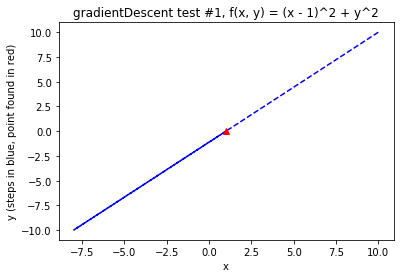

gradientDescent test #2
Point found:
[ 1.00000000e+00 -4.99772359e-05]
Number of steps:
3962
Error:
4.997723593308206e-05


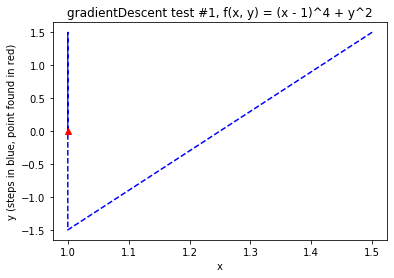

gradientDescent test #3
Point found:
[-78.50447562 -78.50447562]
Number of steps:
4072
Error:
0.049979319510441905


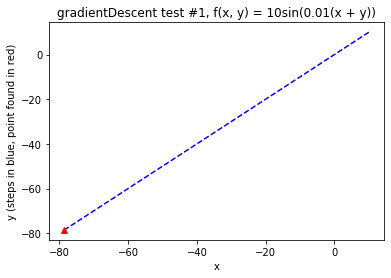

In [0]:
# gradientDescent tests

sol = gradientDescent(
  lambda x: (x[0] - 1)**2 + x[1]**2,
  lambda x: np.array([2*(x[0] - 1), 2*x[1]]),
  np.array([10, 10])
)
print("gradientDescent test #1")
print("Point found:")
print(sol[0])
print("Number of steps:")
print(len(sol[1]))
print("Error:")
print(np.linalg.norm(sol[0] - np.array([1, 0])))
plt.plot([sol[1][i][0] for i in range(len(sol[1]))], [sol[1][i][1] for i in range(len(sol[1]))], 'b--')
plt.plot(sol[0][0], sol[0][1], 'r^')
plt.title('gradientDescent test #1, f(x, y) = (x - 1)^2 + y^2')
plt.ylabel('y (steps in blue, point found in red)')
plt.xlabel('x')
plt.show()

sol = gradientDescent(
  lambda x: (x[0] - 1)**4 + x[1]**2,
  lambda x: np.array([4*(x[0] - 1)**3, 2*x[1]]),
  np.array([1.5, 1.5])
)
print("gradientDescent test #2")
print("Point found:")
print(sol[0])
print("Number of steps:")
print(len(sol[1]))
print("Error:")
print(np.linalg.norm(sol[0] - np.array([1, 0])))
plt.plot([sol[1][i][0] for i in range(len(sol[1]))], [sol[1][i][1] for i in range(len(sol[1]))], 'b--')
plt.plot(sol[0][0], sol[0][1], 'r^')
plt.title('gradientDescent test #1, f(x, y) = (x - 1)^4 + y^2')
plt.ylabel('y (steps in blue, point found in red)')
plt.xlabel('x')
plt.show()

sol = gradientDescent(
  lambda x: 10*math.sin(0.01*(x[0] + x[1])),
  lambda x: np.array([0.1*math.cos(0.01*(x[0] + x[1])), 0.1*math.cos(0.01*(x[0]+ x[1]))]),
  np.array([10, 10])
)
print("gradientDescent test #3")
print("Point found:")
print(sol[0])
print("Number of steps:")
print(len(sol[1]))
print("Error:")
print(np.linalg.norm(sol[0] - np.array([-25*math.pi, -25*math.pi])))
plt.plot([sol[1][i][0] for i in range(len(sol[1]))], [sol[1][i][1] for i in range(len(sol[1]))], 'b--')
plt.plot(sol[0][0], sol[0][1], 'r^')
plt.title('gradientDescent test #1, f(x, y) = 10sin(0.01(x + y))')
plt.ylabel('y (steps in blue, point found in red)')
plt.xlabel('x')
plt.show()

These are the accuracy and convergence tests for the newtonMinimization method.

The functions tested are:

* $f(x, y) = (x - 1)^2 + y^2, \quad \nabla f(x, y) = (2(x - 1), 2y), Hf(x, y) = \left ( \begin{array}{cc}
2 & 0 \\
0 & 2
\end{array} \right ), \quad P = (1, 0)$
* $f(x, y) = (x - 1)^4 + y^2, \quad \nabla f(x, y) = (4(x - 1)^3, 2y), Hf(x, y) = \left ( \begin{array}{cc}
12(x - 1)^2 & 0 \\
0 & 2
\end{array} \right ), \quad P = (1, 0)$
* $f(x, y) = x^2cos(y), \quad \nabla f(x, y) = (2xcos(y), -x^2sin(y)), Hf(x, y) = \left ( \begin{array}{cc}
2cos(y) & -2xsin(y) \\
-2xsin(y) & -x^2cos(y)
\end{array} \right ), \quad P = \left ( 0, \frac{\pi}{2} \right )$

Where in each case $P$ is the critical point of $f$ which is closest to the approximation found by the algorithm.

The accuracy is verified because the error $\|sol[0] - P\|$ is very small for all functions tested.

The convergence is verified graphically by looking at the steps taken by the algorithm in the $x$ vs. $y$ plot.

Further analysis can be found in the Discussion section.

newtonMinimzation test #1
Point found:
[1. 0.]
Number of steps:
2
Error:
0.0


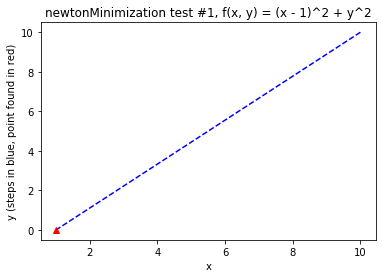

newtonMinimzation test #2
Point found:
[1.01950922 0.        ]
Number of steps:
9
Error:
0.019509221155311618


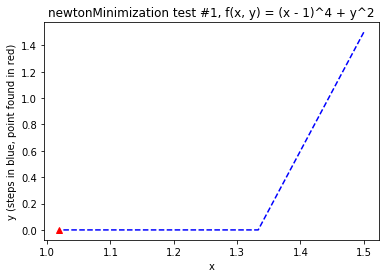

newtonMinimization test #3
Point found:
[0.00607346 1.56593199]
Number of steps:
8
Error:
0.007781303072183963


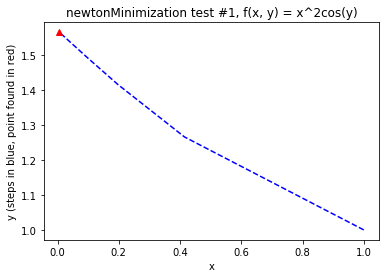

In [0]:
# newtonMinimization tests

sol = newtonMinimization(
  lambda x: (x[0] - 1)**2 + x[1]**2,
  lambda x: np.array([2*(x[0] - 1), 2*x[1]]),
  lambda x: np.array(
    [[2, 0],
    [0, 2]]
  ),
  np.array([10, 10])
)
print("newtonMinimzation test #1")
print("Point found:")
print(sol[0])
print("Number of steps:")
print(len(sol[1]))
print("Error:")
print(np.linalg.norm(sol[0] - np.array([1, 0])))
plt.plot([sol[1][i][0] for i in range(len(sol[1]))], [sol[1][i][1] for i in range(len(sol[1]))], 'b--')
plt.plot(sol[0][0], sol[0][1], 'r^')
plt.title('newtonMinimization test #1, f(x, y) = (x - 1)^2 + y^2')
plt.ylabel('y (steps in blue, point found in red)')
plt.xlabel('x')
plt.show()

sol = newtonMinimization(
  lambda x: (x[0] - 1)**4 + x[1]**2,
  lambda x: np.array([4*(x[0] - 1)**3, 2*x[1]]),
  lambda x: np.array(
    [[12*(x[0] - 1)**2, 0],
    [0, 2]]
  ),
  np.array([1.5, 1.5])
)
print("newtonMinimzation test #2")
print("Point found:")
print(sol[0])
print("Number of steps:")
print(len(sol[1]))
print("Error:")
print(np.linalg.norm(sol[0] - np.array([1, 0])))
plt.plot([sol[1][i][0] for i in range(len(sol[1]))], [sol[1][i][1] for i in range(len(sol[1]))], 'b--')
plt.plot(sol[0][0], sol[0][1], 'r^')
plt.title('newtonMinimization test #1, f(x, y) = (x - 1)^4 + y^2')
plt.ylabel('y (steps in blue, point found in red)')
plt.xlabel('x')
plt.show()

sol = newtonMinimization(
  lambda x: x[0]**2*math.cos(x[1]),
  lambda x: np.array([2*x[0]*math.cos(x[1]), -x[0]**2*math.sin(x[1])]),
  lambda x: np.array(
    [[2*math.cos(x[1]), -2*x[0]*math.sin(x[1])],
    [-2*x[0]*math.sin(x[1]), -x[0]**2*math.cos(x[1])]]
  ),
  np.array([1, 1])
)
print("newtonMinimization test #3")
print("Point found:")
print(sol[0])
print("Number of steps:")
print(len(sol[1]))
print("Error:")
print(np.linalg.norm(sol[0] - np.array([0, math.pi/2])))
plt.plot([sol[1][i][0] for i in range(len(sol[1]))], [sol[1][i][1] for i in range(len(sol[1]))], 'b--')
plt.plot(sol[0][0], sol[0][1], 'r^')
plt.title('newtonMinimization test #1, f(x, y) = x^2cos(y)')
plt.ylabel('y (steps in blue, point found in red)')
plt.xlabel('x')
plt.show()

# **Discussion**

We conclude that with the gradientDescent method one has to be careful to choose $\beta$ close enough to $1$, as otherwise satisfying the inequality with it will be impossible. We also have to be careful to use it with functions with critical points with distance between them large enough, as otherwise the method may loop. Because of this we chose the function in its third test with a factor of $10$ in its amplitude and a factor of $0.01$ in its frequency.

As the gradientDescent method we implemented tries to take large steps, this leads to some erratic behavior. However, it corrects itself in the following steps and eventually converges.

The newtonMinimization method we implemented takes only one extra step if the objective function is quadratic, and three (!) orders of magnitude less steps than the gradientDescent method tests in its other tests. However, it is less precise. This may be corrected with by choosing a smaller $\gamma$.

In writing this report I collaborated with Fabián Levicán, and used the lecture notes.